<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/Logo_INSAvilletoulouse-RVB.png" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Initiation à l'ACP avec <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>
# de la SVD à l'ACP - exemples élémentaires
#### Résumé 
Décomposition en valeurs singulières [SVD](http://wikistat.fr/pdf/st-m-explo-alglin.pdf) d'une matrice rectangulaire comme introduction à l'[Analyse en Composantes Principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf) (ACP); illustration sur des données fictives avec R puis avec le package [`FactoMineR`](http://factominer.free.fr/); application à des données élémentaires: courbes annuelles de températures moyennes mensuelles de 36 villes françaises.

#### Avertissement
Les différents travaux et analyses proposés tout au long de ces documents sont largement explicités. Les commandes en R ou Python toutes fournies. L'important n'est pas de trouver la bonne syntaxe des commandes ni de finir au plus vite mais de réfléchir sur les méthodes, leurs conditions d'applications, les résultats obtenus. L'apprentissage de ces logiciels et de leur programmation est dispensés dans d'autres tutoriels.

Répondre aux questions **Q** tout au long de la réalisation.

## 1 SVD et recherche d'éléments propres
Cette section se propose d'illustrer les principaux résultats d'[algèbre linéaire](http://wikistat.fr/pdf/st-m-explo-alglin.pdf) utiles en exploration statistique multidimensionnelle. Ceci concerne les valeurs et vecteurs propres de matrices symétriques en lien avec la décomposition en valeur singulière ou SVD d'une matrice rectangulaire $n\times p$ pour en faire une approximation par une matrice de mêmes dimensions mais de rang inférieur.
### 1.1 SVD avec métrique usuelle
Décomposition en valeurs singulières d'une matrice rectangulaire relativement à des métriques classiques définies par la matrice identité.

**Q** Ecrire la formule de la décomposition en valeurs singulières d'une matrice rectangulaire. 

**Q** De quelles matrice les vecteurs singuliers sont vecteurs propres?

In [1]:
# Génération d'un matrice n x p
X=matrix(runif(100),20,5)
# SVD
res=svd(X)
# Valeurs singulières
res$d

[1] 5.1866930 1.6435654 1.4531712 1.1632735 0.8440456

In [2]:
# Vérifier l'orthonormalité des vecteurs
t(res$u)%*%res$u

1.000000e+00,1.908196e-17,-2.775558e-17,1.491862e-16,0.000000e+00
1.908196e-17,1.000000e+00,1.942890e-16,6.461845e-17,-3.191891e-16
-2.775558e-17,1.942890e-16,1.000000e+00,2.081668e-17,2.775558e-17
1.491862e-16,6.461845e-17,2.081668e-17,1.000000e+00,-4.163336e-17
0.000000e+00,-3.191891e-16,2.775558e-17,-4.163336e-17,1.000000e+00


In [3]:
t(res$v)%*%res$v

1.000000e+00,1.387779e-16,-1.110223e-16,-1.665335e-16,2.081668e-16
1.387779e-16,1.000000e+00,-5.551115e-17,-2.498002e-16,4.163336e-17
-1.110223e-16,-5.551115e-17,1.000000e+00,0.000000e+00,-8.326673e-17
-1.665335e-16,-2.498002e-16,0.000000e+00,1.000000e+00,-3.122502e-17
2.081668e-16,4.163336e-17,-8.326673e-17,-3.122502e-17,1.000000e+00


In [4]:
# Vérifier la reconstruction de X
# à l'erreur machine près
X-res$u%*%diag(res$d)%*%t(res$v)

-6.661338e-16,-9.436896e-16,-1.443290e-15,-8.881784e-16,-1.165734e-15
-3.885781e-16,-8.881784e-16,-4.163336e-16,-5.551115e-16,-2.220446e-16
-5.551115e-16,-8.881784e-16,-2.498002e-16,-9.992007e-16,-4.440892e-16
-3.885781e-16,-6.661338e-16,-6.661338e-16,-6.661338e-16,-6.661338e-16
-6.661338e-16,-6.661338e-16,-6.661338e-16,-7.771561e-16,-4.440892e-16
-2.289835e-16,-2.636780e-16,-3.330669e-16,-2.220446e-16,-6.661338e-16
-4.440892e-16,-5.551115e-16,-6.661338e-16,-5.551115e-16,-6.661338e-16
-4.440892e-16,-3.330669e-16,-5.551115e-16,-5.551115e-16,-5.967449e-16
-3.885781e-16,-4.440892e-16,-5.551115e-16,-2.220446e-16,-7.771561e-16
-1.110223e-16,8.326673e-17,-3.330669e-16,-5.551115e-17,-5.273559e-16
-5.551115e-16,-4.440892e-16,-4.996004e-16,-5.551115e-16,-2.498002e-16


**Q** Comparer ci-dessous les valeurs propres des matrices **X'X** et **XX'**. Que dire des dimensions, du rang de ces matrices, de la multiplicité de la valeur propre nulle? 

**Q** Comparer avec les valeurs propres et les valeurs singulières de **X**.

In [5]:
# Valeurs et vecteurs propres
dec1=eigen(t(X)%*%X)
dec2=eigen(X%*%t(X))
dec1$values

[1] 26.901785  2.701307  2.111706  1.353205  0.712413

In [6]:
dec2$values

[1]  2.690178e+01  2.701307e+00  2.111706e+00  1.353205e+00  7.124130e-01
 [6]  2.426432e-15  1.108812e-15  3.918803e-16  1.501119e-16  1.444708e-16
[11]  8.847777e-17  8.510374e-17  2.403003e-18 -1.514876e-17 -3.280103e-17
[16] -1.079881e-16 -1.186238e-16 -1.373599e-16 -1.781409e-16 -2.858003e-16

In [7]:
sqrt(dec1$values)

[1] 5.1866930 1.6435654 1.4531712 1.1632735 0.8440456

In [8]:
U=dec2$vectors
V=dec1$vectors
# Orthonormalité des vecteurs
t(V)%*%V

1.000000e+00,-8.326673e-17,1.110223e-16,-5.551115e-17,-5.551115e-17
-8.326673e-17,1.000000e+00,-2.220446e-16,-2.081668e-16,3.469447e-17
1.110223e-16,-2.220446e-16,1.000000e+00,2.498002e-16,6.938894e-17
-5.551115e-17,-2.081668e-16,2.498002e-16,1.000000e+00,-3.816392e-17
-5.551115e-17,3.469447e-17,6.938894e-17,-3.816392e-17,1.000000e+00


In [9]:
t(U)%*%U

1.000000e+00,8.933826e-17,-8.326673e-17,2.949030e-17,0.000000e+00,1.387779e-16,9.020562e-17,-4.336809e-17,-5.551115e-17,-2.862294e-17,4.857226e-17,6.938894e-18,-4.163336e-17,-1.387779e-17,2.775558e-17,2.081668e-17,-2.081668e-17,-3.469447e-17,-2.775558e-17,-2.081668e-17
8.933826e-17,1.000000e+00,6.245005e-17,3.282964e-16,1.144917e-16,3.313322e-16,2.775558e-17,1.196959e-16,9.540979e-17,-1.797607e-16,-4.423545e-17,-6.938894e-18,1.613293e-16,3.937822e-16,1.864828e-16,-6.982262e-17,-2.541370e-16,1.665335e-16,-2.615096e-16,3.382711e-17
-8.326673e-17,6.245005e-17,1.000000e+00,-2.498002e-16,1.387779e-16,1.110223e-16,1.318390e-16,-1.734723e-16,-3.469447e-17,-5.030698e-17,6.245005e-17,1.387779e-17,0.000000e+00,-4.163336e-17,-8.326673e-17,1.838807e-16,-1.387779e-17,6.938894e-17,3.469447e-18,2.359224e-16
2.949030e-17,3.282964e-16,-2.498002e-16,1.000000e+00,3.400058e-16,1.630640e-16,1.335737e-16,-8.890458e-17,-1.214306e-17,-3.165870e-17,-1.561251e-17,4.857226e-17,8.326673e-17,1.734723e-17,2.116363e-16,-7.719519e-17,5.551115e-17,1.127570e-16,-1.769418e-16,1.231654e-16
0.000000e+00,1.144917e-16,1.387779e-16,3.400058e-16,1.000000e+00,5.551115e-17,4.163336e-17,-2.081668e-17,4.163336e-17,-5.724587e-17,-6.938894e-18,8.326673e-17,5.551115e-17,2.775558e-17,6.938894e-17,4.163336e-17,-4.163336e-17,-5.551115e-17,-7.632783e-17,-6.938894e-18
1.387779e-16,3.313322e-16,1.110223e-16,1.630640e-16,5.551115e-17,1.000000e+00,2.983724e-16,1.942890e-16,1.457168e-16,5.377643e-17,4.163336e-17,-2.775558e-17,-4.163336e-17,6.938894e-17,0.000000e+00,2.671474e-16,4.163336e-17,1.110223e-16,-1.040834e-17,1.179612e-16
9.020562e-17,2.775558e-17,1.318390e-16,1.335737e-16,4.163336e-17,2.983724e-16,1.000000e+00,-1.040834e-17,7.459311e-17,-1.578598e-16,2.775558e-17,5.551115e-17,3.469447e-17,9.367507e-17,2.185752e-16,3.469447e-18,-2.220446e-16,6.591949e-17,-1.960238e-16,6.938894e-17
-4.336809e-17,1.196959e-16,-1.734723e-16,-8.890458e-17,-2.081668e-17,1.942890e-16,-1.040834e-17,1.000000e+00,1.066855e-16,-1.838807e-16,-7.546047e-17,-1.387779e-17,-2.081668e-17,-2.307182e-16,9.020562e-17,-5.637851e-17,1.578598e-16,-1.526557e-16,1.370432e-16,-2.081668e-17
-5.551115e-17,9.540979e-17,-3.469447e-17,-1.214306e-17,4.163336e-17,1.457168e-16,7.459311e-17,1.066855e-16,1.000000e+00,6.938894e-17,1.561251e-17,-2.428613e-17,-1.040834e-17,6.591949e-17,-5.551115e-17,1.474515e-16,-1.734723e-17,2.428613e-17,-5.204170e-18,3.035766e-17
-2.862294e-17,-1.797607e-16,-5.030698e-17,-3.165870e-17,-5.724587e-17,5.377643e-17,-1.578598e-16,-1.838807e-16,6.938894e-17,1.000000e+00,5.941428e-17,-2.168404e-16,4.250073e-17,-8.066464e-17,6.938894e-18,2.194425e-16,8.933826e-17,-2.688821e-17,-3.903128e-18,3.599551e-17
4.857226e-17,-4.423545e-17,6.245005e-17,-1.561251e-17,-6.938894e-18,4.163336e-17,2.775558e-17,-7.546047e-17,1.561251e-17,5.941428e-17,1.000000e+00,-4.510281e-17,3.469447e-18,-1.214306e-16,1.283695e-16,-1.023487e-16,-3.469447e-18,1.040834e-16,-1.873501e-16,1.821460e-16


**Q** Vérifier la bonne cohérence des dimensions de ces vecteurs puis comparer les vecteurs singuliers à droite et à gauche de **X** avec les vecteurs propres de ces matrices. D'où viennent les différences ?

In [10]:
V-res$v

-2.775558e-16,0.7590135,-2.164935e-15,1.47905436,-0.2610235
3.330669e-16,0.8454656,-8.326673e-16,-0.52453374,1.4997281
4.440892e-16,-1.4538214,2.664535e-15,-0.08681149,0.4920312
4.440892e-16,0.4067948,-4.302114e-16,-1.11418062,-1.1844410
3.330669e-16,-0.6557497,7.771561e-16,0.53696172,-0.1941317


In [11]:
U[,1:5]-res$u

-1.110223e-16,-1.582068e-15,0.43100819,0.35178145,0.18913729
-5.551115e-17,1.665335e-15,-0.55078616,-0.01591914,0.37311758
2.775558e-17,-1.110223e-15,0.21019226,-0.13424458,-0.09480330
0.000000e+00,9.992007e-16,-0.44219011,-0.01300894,0.32666255
-5.551115e-17,2.220446e-16,-0.28938367,0.55014424,-0.08561247
-5.551115e-17,2.775558e-16,-0.04443626,-0.40284475,-0.34215363
0.000000e+00,8.326673e-17,0.13879320,-0.39743682,0.20241481
0.000000e+00,-1.471046e-15,0.69532876,-0.29106648,-0.19313877
-5.551115e-17,4.440892e-16,-0.05501171,-0.17148049,0.28133802
-8.326673e-17,-1.554312e-15,0.65940053,0.58535525,0.38037077
-2.775558e-17,-1.110223e-15,0.35514391,0.44321712,-0.10215528


**Q** Vérifier que les premiers termes de la SVD sont la meilleure approximation de **X** par une matrice de rang inférieure.

In [12]:
# approximation de rang 4
Xhat=res$u[,1:4]%*%diag(res$d[1:4])%*%t(res$v[,1:4])
# calcul de la norme ||X-Xhat||^2 
sum((X-Xhat)**2)

[1] 0.712413

**Q** Comparer cette norme avec les carrés des valeurs singulières, que vaudrait cette norme avec une approximation de rang 3?


**Q** Retrouver ci-dessous la matrice des vecteurs singuliers à droite à partir de celle des vecteurs singuliers à gauche et réciproquement.

In [13]:
# Vecteurs singuliers à gauche: 
Ug=res$u
# vecteurs singuliers à droites 
# calculés à partir de U
Vd=t(X)%*%Ug
# Vérifier l'orthogonalité
t(Vd)%*%Vd

2.690178e+01,-1.110223e-15,-1.776357e-15,4.551914e-15,-2.498002e-15
-1.110223e-15,2.701307e+00,2.220446e-16,1.332268e-15,-9.853229e-16
-1.776357e-15,2.220446e-16,2.111706e+00,-2.775558e-16,4.579670e-16
4.551914e-15,1.332268e-15,-2.775558e-16,1.353205e+00,6.279699e-16
-2.498002e-15,-9.853229e-16,4.579670e-16,6.279699e-16,7.124130e-01


mais pas l'orthonormalité

**Q** Que vaut la diagonale ?

In [14]:
diag(t(Vd)%*%Vd)-res$d**2

[1] -1.421085e-14 -4.884981e-15  2.220446e-15  0.000000e+00  4.440892e-16

Il est nécessaire de normer les vecteurs.

In [15]:
Vd=Vd%*%diag(1/res$d)
t(Vd)%*%Vd

1.000000e+00,-1.387779e-16,-1.110223e-16,7.355228e-16,-5.828671e-16
-1.387779e-16,1.000000e+00,1.110223e-16,7.494005e-16,-7.424616e-16
-1.110223e-16,1.110223e-16,1.000000e+00,-2.220446e-16,3.608225e-16
7.355228e-16,7.494005e-16,-2.220446e-16,1.000000e+00,6.210310e-16
-5.828671e-16,-7.424616e-16,3.608225e-16,6.210310e-16,1.000000e+00


In [16]:
# Vérifier
Vd-res$v

2.220446e-16,3.885781e-16,-1.110223e-16,-5.551115e-16,1.665335e-16
4.440892e-16,9.992007e-16,-2.220446e-16,-7.216450e-16,3.330669e-16
3.885781e-16,-7.771561e-16,1.110223e-16,5.551115e-17,-2.498002e-16
3.330669e-16,5.828671e-16,1.942890e-16,-4.440892e-16,8.881784e-16
4.440892e-16,-6.106227e-16,4.440892e-16,-2.775558e-16,1.526557e-16


**Q** Retrouver de façon analogue les vecteurs singuliers `Ug` à partir de ceux `Vd` en prémultipliant par la matrice `X`.

### 1.2 SVD généralisée
Les calculs précédents concernent des matrices (applications linéaires) dans des espaces euclidiens munis de métriques usuelles définies par les matrices identités. Pour calculer une SVD généralisée par rapport à des métriques quelconques, celà nécessite d'introduire des changements de métriques car la SVCD généralisée n'est pas prévue dans les logiciels. 

Comme en ACP, on considère une métrique dans l'espace vectoriel $\boldsymbol{R}^p (p=5)$ définie par une matrice $\boldsymbol{M}$ symétrique définie positive et une métrique de matrice diagonale $\boldsymbol{D}$ sur l'expace  vectoriel $\boldsymbol{R}^n (n=20)$. La SVD de $\boldsymbol{X}$ relativement à $\boldsymbol{M}$ et $\boldsymbol{D}$ est calculée à partir de celle classique de $\boldsymbol{D}^{1/2}\boldsymbol{X}\boldsymbol{M}^{1/2}$ relativement aux métriques de matrice identité;  $\boldsymbol{M}^{1/2}$ est la racine carrée de $\boldsymbol{M}$. 

En effet, si $\boldsymbol{D}^{1/2}\boldsymbol{X}\boldsymbol{M}^{1/2}=\boldsymbol{U}\boldsymbol{\Lambda}\boldsymbol{V}' \quad \text{avec} \quad \boldsymbol{U'U}=\boldsymbol{I} \quad \text{et} \quad \boldsymbol{V'V}=\boldsymbol{I}$

alors en prémultipliant à gauche et multipliant à droite:

$
\boldsymbol{X}=\boldsymbol{D}^{-1/2}\boldsymbol{U}\boldsymbol{\Lambda}\boldsymbol{V}'\boldsymbol{M}^{-1/2} =  \left(\boldsymbol{D}^{-1/2}\boldsymbol{U}\right)\boldsymbol{\Lambda}\left(\boldsymbol{M}^{-1/2}\boldsymbol{V}\right)'
$

et $\boldsymbol{D}^{-1/2}\boldsymbol{U}$ définit les vecteurs $\boldsymbol{D}$-orthonormés singuliers à gauche  et $\boldsymbol{M}^{-1/2}\boldsymbol{V}$ ceux à droite de la SVD$(\boldsymbol{X,M,D})$
car ils vérifient bien:
$
\left(\boldsymbol{D}^{-1/2}\boldsymbol{U}\right)'\boldsymbol{D}\left(\boldsymbol{D}^{-1/2}\boldsymbol{U}\right)=\boldsymbol{I} \quad\text{et}\quad \left(\boldsymbol{M}^{-1/2}\boldsymbol{V}\right)'\boldsymbol{M}\left(\boldsymbol{M}^{-1/2}\boldsymbol{V}\right)=\boldsymbol{I}.
$

Construction des différentes matrices.

In [17]:
# Matrice M symétrique définie positive
H=matrix(rnorm(25),5,5)
M=t(H)%*%H
# Décompostion de M
s=eigen(M);l=s$values;v=s$vectors
l; v

[1] 17.52799883 11.37547750  4.37043671  2.02820212  0.09606782

0.5500448,0.69976508,0.23152256,-0.34215359,0.1926339
-0.1743874,0.01531795,-0.55004719,-0.17176049,0.7983112
0.4841688,-0.08667577,0.04763162,0.81044150,0.3146168
-0.4369097,0.70596943,-0.28048623,0.43408023,-0.2088514
-0.4916607,0.06471996,0.75026934,0.09048855,0.4277719


In [18]:
# Racine de M 
Mr=v%*%diag(sqrt(l))%*%t(v)
# Inverse de racine de M
Mi=v%*%diag(1/sqrt(l))%*%t(v)
# vérifications
Mr%*%Mi;M-Mr%*%Mr

1.000000e+00,1.221245e-15,1.165734e-15,4.163336e-16,-1.110223e-16
2.498002e-16,1.000000e+00,-2.220446e-16,-4.163336e-16,1.665335e-16
8.881784e-16,1.665335e-15,1.000000e+00,-2.775558e-17,1.554312e-15
-1.665335e-16,-2.109424e-15,-1.110223e-16,1.000000e+00,-1.332268e-15
-5.551115e-16,0.000000e+00,8.881784e-16,-4.440892e-16,1.000000e+00


-3.552714e-15,-2.886580e-15,-2.220446e-15,-2.775558e-15,-4.440892e-16
-2.886580e-15,2.220446e-15,-4.218847e-15,9.547918e-15,4.052314e-15
-4.440892e-16,-4.440892e-15,1.154632e-14,-1.110223e-14,-1.287859e-14
-1.443290e-15,9.103829e-15,-1.021405e-14,1.598721e-14,1.421085e-14
0.000000e+00,4.274359e-15,-1.243450e-14,1.421085e-14,1.243450e-14


In [19]:
# Construction de D
w=runif(20); w=w/sum(w)
D=diag(w)
Dr=diag(sqrt(w)); Di=diag(1/sqrt(w))

Construction de la SVD$(\boldsymbol{X,M,D})$ et vérifications.

In [20]:
# SVD de l'image de X (changement de métrique)
s=svd(Dr%*%X%*%Mr)
U=s$u;L=s$d;V=s$v
# Nouveaux vecteurs singuliers
Ud=Di%*%U
Vm=Mi%*%V
# Vérifications
t(Vm)%*%M%*%Vm

1.000000e+00,8.604228e-16,-2.220446e-16,-7.702172e-16,-1.332268e-15
8.326673e-16,1.000000e+00,2.220446e-16,-8.326673e-16,1.332268e-15
-1.942890e-16,1.942890e-16,1.000000e+00,1.082467e-15,-4.440892e-16
-8.049117e-16,-9.783840e-16,1.332268e-15,1.000000e+00,3.996803e-15
-9.896597e-16,1.202163e-15,-6.557255e-16,3.750472e-15,1.000000e+00


In [21]:
t(Ud)%*%D%*%Ud
X-Ud%*%diag(L)%*%t(Vm)

1.000000e+00,5.551115e-17,6.418477e-17,3.469447e-17,1.110223e-16
2.775558e-17,1.000000e+00,-4.683753e-17,-1.179612e-16,0.000000e+00
6.245005e-17,-1.734723e-18,1.000000e+00,-1.019150e-16,-3.816392e-17
2.775558e-17,-1.040834e-16,-1.296706e-16,1.000000e+00,-5.551115e-17
1.387779e-16,0.000000e+00,-3.122502e-17,-8.326673e-17,1.000000e+00


4.440892e-16,-1.554312e-15,-7.993606e-15,-6.661338e-15,-4.440892e-16
4.440892e-16,1.221245e-15,-8.187895e-16,1.110223e-16,1.221245e-15
4.440892e-16,7.771561e-16,-7.216450e-16,0.000000e+00,9.436896e-16
-1.665335e-16,-8.881784e-16,-8.881784e-16,1.554312e-15,2.220446e-16
1.110223e-16,-6.661338e-16,-1.998401e-15,5.551115e-16,5.551115e-16
-2.220446e-16,-5.551115e-17,-3.330669e-16,4.440892e-16,0.000000e+00
-4.440892e-16,-3.330669e-16,-5.551115e-16,6.661338e-16,1.110223e-16
-3.330669e-16,-8.326673e-16,-8.881784e-16,3.330669e-16,-4.163336e-16
-6.106227e-16,-1.332268e-15,-1.221245e-15,7.771561e-16,-6.661338e-16
-8.881784e-16,-2.775558e-15,-1.221245e-15,1.804112e-16,-1.665335e-15
-1.110223e-16,0.000000e+00,-8.881784e-16,-2.220446e-16,9.159340e-16


## 2 Application de la SVD à l'ACP
L'objectif est de bien comprendre quels sont les résultats / matrices produites par les différentes façons d'aborder l'analyse en composantes principales.
### 2.1 Données
Les données sont celles de l'exemple [introduction à l'ACP](http://wikistat.fr/pdf/st-l-des-multi): les notes en maths, français, physique et anglais de 9 lycéens virtuels.

In [22]:
# Matrice des données
note=matrix(c(6,6,5,5.5,8,8,8,8,
6,7,11,9.5,14.5,14.5,15.5,15,
14,14,12,12.5,11,10,5.5,7,
5.5,7,14,11.5,13,12.5,8.5,9.5,
9,9.5,12.5,12),nrow=9,byrow=TRUE)
note=data.frame(note)
nomi=c("jean","alai","anni","moni",
 "didi","andr","pier","brig","evel")
nomv=c("Math","Phys","Fran","Angl")
dimnames(note)[[1]]=nomi
dimnames(note)[[2]]=nomv
# Vérification
note

,Math,Phys,Fran,Angl
jean,6.0,6.0,5.0,5.5
alai,8.0,8.0,8.0,8.0
anni,6.0,7.0,11.0,9.5
moni,14.5,14.5,15.5,15.0
didi,14.0,14.0,12.0,12.5
andr,11.0,10.0,5.5,7.0
pier,5.5,7.0,14.0,11.5
brig,13.0,12.5,8.5,9.5
evel,9.0,9.5,12.5,12.0


Statistiques élémentaires : 

      Math             Phys             Fran            Angl      
 Min.   : 5.500   Min.   : 6.000   Min.   : 5.00   Min.   : 5.50  
 1st Qu.: 6.000   1st Qu.: 7.000   1st Qu.: 8.00   1st Qu.: 8.00  
 Median : 9.000   Median : 9.500   Median :11.00   Median : 9.50  
 Mean   : 9.667   Mean   : 9.833   Mean   :10.22   Mean   :10.06  
 3rd Qu.:13.000   3rd Qu.:12.500   3rd Qu.:12.50   3rd Qu.:12.00  
 Max.   :14.500   Max.   :14.500   Max.   :15.50   Max.   :15.00  

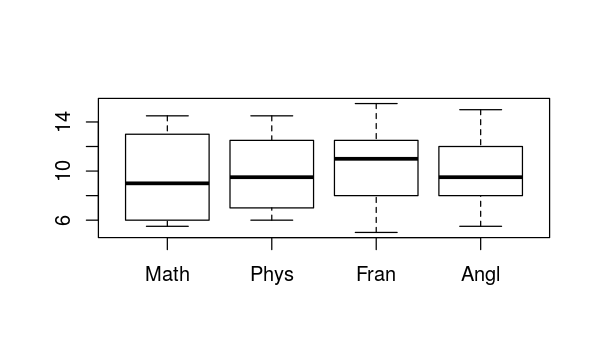

In [23]:
summary(note)
options(repr.plot.width=5, repr.plot.height=3)
boxplot(note)

In [24]:
X=as.matrix(note)
# Matrice des variances covariances
var(X)

,Math,Phys,Fran,Angl
Math,12.812500,11.156250,2.989583,5.427083
Phys,11.156250,10.062500,4.635417,6.166667
Fran,2.989583,4.635417,13.569444,10.454861
Angl,5.427083,6.166667,10.454861,8.902778


In [25]:
# Matrice des corrélations
cor(X)

,Math,Phys,Fran,Angl
Math,1.0000000,0.9825357,0.2267319,0.5081440
Phys,0.9825357,1.0000000,0.3966932,0.6515305
Fran,0.2267319,0.3966932,1.0000000,0.9512058
Angl,0.5081440,0.6515305,0.9512058,1.0000000


**Q** Commenter la matrice des corrélations ci-dessus.
### 2.2 ACP pas à pas
Tout langage matricielle permet de construire très facilement une ACP. Attention, la formule de variance utilise $(n-1)$ (estimateur sans biais) au lieu de $n$ comme diviseur afin de retrouver les résultats des fonctions R. Un logiciel *français* peut donc fournir des résultats légèrement différents. Un des objectifs des cette approche élémentaire sur des données jouet est justement de faire le tri.

In [26]:
# Matrice centrée
Xb=scale(X,scale=F)
Xb

,Math,Phys,Fran,Angl
jean,-3.6666667,-3.8333333,-5.2222222,-4.5555556
alai,-1.6666667,-1.8333333,-2.2222222,-2.0555556
anni,-3.6666667,-2.8333333,0.7777778,-0.5555556
moni,4.8333333,4.6666667,5.2777778,4.9444444
didi,4.3333333,4.1666667,1.7777778,2.4444444
andr,1.3333333,0.1666667,-4.7222222,-3.0555556
pier,-4.1666667,-2.8333333,3.7777778,1.4444444
brig,3.3333333,2.6666667,-1.7222222,-0.5555556
evel,-0.6666667,-0.3333333,2.2777778,1.9444444


In [27]:
# Covariance
S=t(Xb)%*%Xb/8
# SVD
res=svd(Xb)
# Matrices des vecteurs propres
U=res$u;V=res$v
# Valeurs singulières
vs=res$d

Valeurs singulières de $(\bar{X}, I_p, I_n)$ puis avec $1/n I_n$ sivi de  $1/(n-1) I_n$

In [28]:
vs

[1] 15.9409486 10.4055233  0.5419300  0.3087624

In [29]:
vs/sqrt(8)

[1] 5.6359764 3.6789080 0.1916012 0.1091640

In [30]:
vs/sqrt(9)

[1] 5.3136495 3.4685078 0.1806433 0.1029208

Valeurs propres avec $n-1$ comme diviseur

In [31]:
(vs**2)/8

[1] 31.76423012 13.53436431  0.03671101  0.01191678

Valeurs propres avec $n$ comme diviseur

In [32]:
(vs**2)/9

[1] 28.23487122 12.03054605  0.03263201  0.01059269

Vecteurs propres de $\bar{X}'\bar{X}/(n-1)$ ou $/n$ ou vecteurs singuliers à droite de $\bar{X}$

In [33]:
V

0.5151694,0.5686517,-0.1852853,-0.6139259
0.5076129,0.3712665,0.4499844,0.6340381
0.4922789,-0.6581534,0.4603842,-0.3354728
0.4843461,-0.3250085,-0.7424485,0.3294671


In [34]:
# Valeurs propres 
L=res$d*res$d/8; pct=L/sum(L)
L;pct

[1] 31.76423012 13.53436431  0.03671101  0.01191678

[1] 0.7004669429 0.2984607138 0.0008095538 0.0002627896

**Q** Quelle signification statistique donner aux valeurs propres?

In [35]:
# Composantes principales
C=Xb%*%V

Construction de représentations graphiques rudimentaires. 

**Q** Quel est le raphe ci-dessous? Quelle conclusion en tirer?

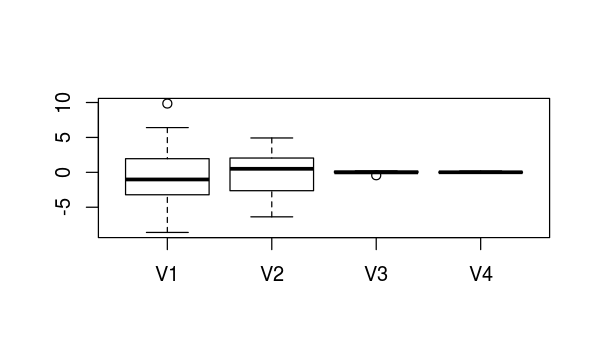

In [36]:
boxplot(as.data.frame(C))

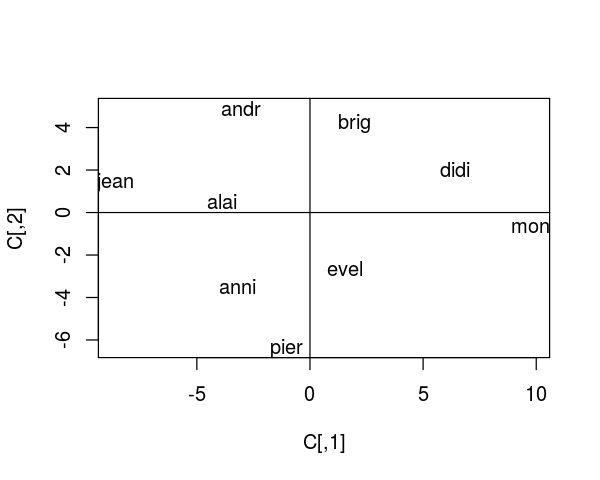

In [37]:
# Coordonnées "isométriques lignes"
options(repr.plot.width=5, repr.plot.height=4)
plot(C,type="n")
text(C,nomi)
abline(h=0,v=0)

**Q** Quelle insuffisance présente ce graphique? Quel choix d'`options` tente de la corriger?

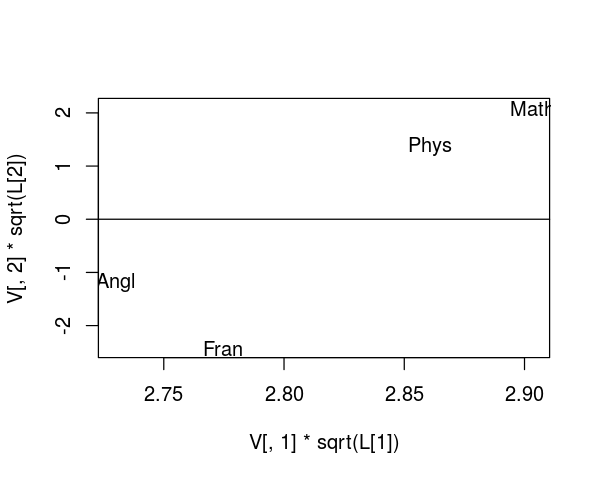

In [38]:
# Coordonnées "isométriques colonnes"
plot(V[,1]*sqrt(L[1]),V[,2]*sqrt(L[2]),type="n")
text(V[,1]*sqrt(L[1]),V[,2]*sqrt(L[2]),nomv)
abline(h=0,v=0)

### 2.4 Fonctions R spécifiques
Plus d'effort est nécessaire pour produire des graphiques lisibles. Autant utiliser les fonctions R adaptées. D'abord avec la fonction `princomp`. 

**Attention**: L'utilisation de fonctions prédéfinies simplifie le travail mais nécessite de bien en contrôler les options part défaut afin de savoir y lire les bons résultats. Deux fonctions sont disponibles dans R: `princomp` et `prcomp`.

#### ACP avec `princomp`

In [39]:
res1.acp=princomp(note)
summary(res1.acp)

Importance of components:
                          Comp.1    Comp.2       Comp.3       Comp.4
Standard deviation     5.3136495 3.4685078 0.1806433317 0.1029208059
Proportion of Variance 0.7004669 0.2984607 0.0008095538 0.0002627896
Cumulative Proportion  0.7004669 0.9989277 0.9997372104 1.0000000000

In [40]:
attributes(res1.acp)

$names
[1] "sdev"     "loadings" "center"   "scale"    "n.obs"    "scores"   "call"    

$class
[1] "princomp"

In [41]:
res1.acp$sdev

Comp.1    Comp.2    Comp.3    Comp.4 
5.3136495 3.4685078 0.1806433 0.1029208

**Q** Quel est le diviseur de la variance pour `princomp`.

Vecteurs propres au signe près.

In [42]:
res1.acp$loadings


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4
Math -0.515  0.569  0.185  0.614
Phys -0.508  0.371 -0.450 -0.634
Fran -0.492 -0.658 -0.460  0.335
Angl -0.484 -0.325  0.742 -0.329

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

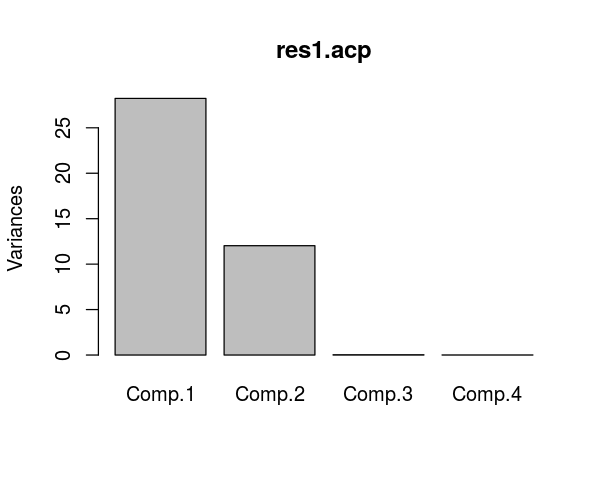

In [43]:
plot(res1.acp)

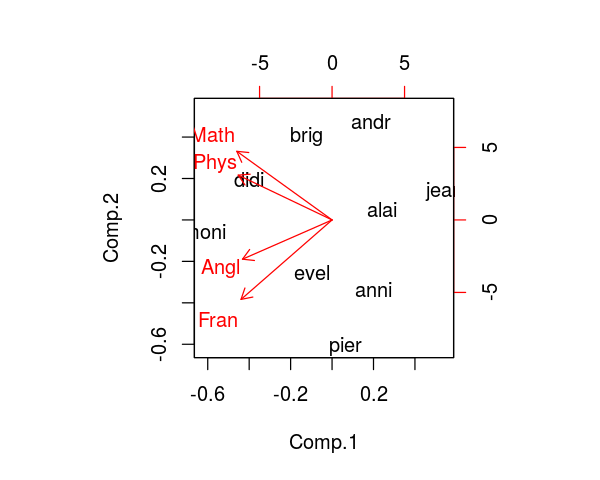

In [44]:
biplot(res1.acp)

**Q** Comment se justifie la superposition des individus et variables dans le même graphique (*biplot*)? 

**Q** Inerprétation des axes.

#### ACP avec  `prcomp`. 

In [45]:
res2.acp=prcomp(note)
summary(res2.acp)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     5.6360 3.6789 0.19160 0.10916
Proportion of Variance 0.7005 0.2985 0.00081 0.00026
Cumulative Proportion  0.7005 0.9989 0.99974 1.00000

In [46]:
attributes(res2.acp)

$names
[1] "sdev"     "rotation" "center"   "scale"    "x"       

$class
[1] "prcomp"

In [47]:
res2.acp$sdev

[1] 5.6359764 3.6789080 0.1916012 0.1091640

**Q** Quel est le diviseur de la variance pour `prcomp`.

Vecteurs propres

In [48]:
res2.acp$rotation

,PC1,PC2,PC3,PC4
Math,0.5151694,0.5686517,-0.1852853,-0.6139259
Phys,0.5076129,0.3712665,0.4499844,0.6340381
Fran,0.4922789,-0.6581534,0.4603842,-0.3354728
Angl,0.4843461,-0.3250085,-0.7424485,0.3294671


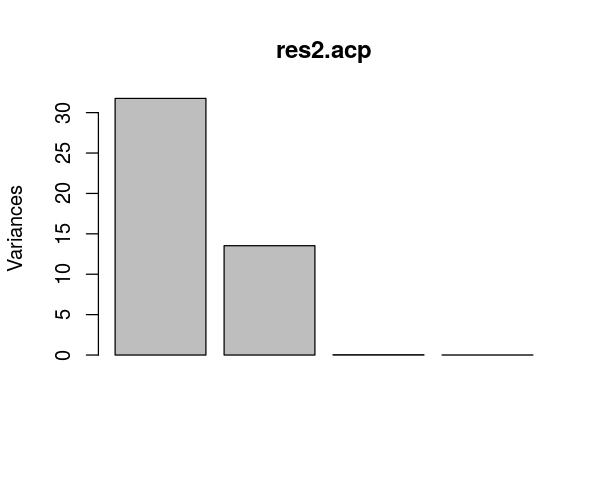

In [49]:
plot(res2.acp)

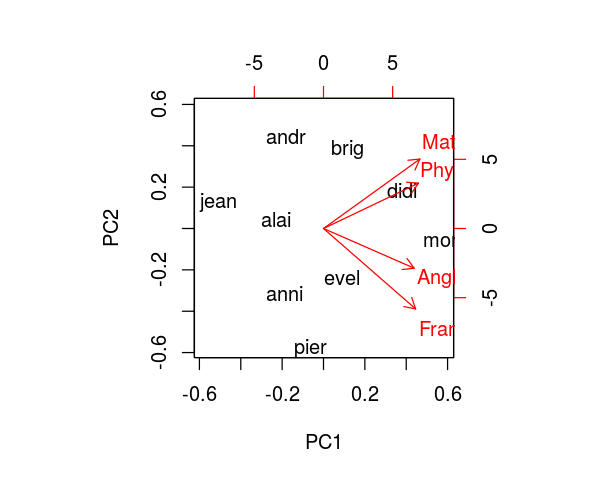

In [50]:
biplot(res2.acp)

**Q** Comparer les aides de ces fonctions pour comprendre d'où viennent les différences. Attention pour `princomp`, le nombre de lignes ($n$) doit être plus grand que le nombre de colonnes $p$; ce n'est pas une contrainte pour `prcomp`.

**Q** Que sont les différents résultats de ces deux fonctions : `sdev` `rotation` `center` `scale` `x` de `prcomp` et `sdev` `loadings` `center` `scores` de `princomp` par rapport aux matrices `U, V, L, C`  précédentes. 

### 2.5 Package FactoMineR
Ce package donne accès à la plupart des méthodes factorielles et de classification non supervisée multidimensionnelles. Son utilisation nécessite, si ce n'est déjà fait, une installation préalable par la commande `install.packages("FactoMineR")` ou par l'utilisation des menus de la fenêtre inférieure droite de RStudio.

In [51]:
library(FactoMineR)
acp=PCA(note, graph=FALSE)

Ce package fournit de très (un peu trop) nombreux résultats et des graphiques dont le flux n'est pas pas compatible avec jupyter. Il est préférable de commander chaque résultat ou graphique dans cet environnement.

In [52]:
print(acp)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 9 individuals, described by 4 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error of 

In [53]:
acp$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,2.875686772,71.89216929,71.89217
comp 2,1.119687364,27.99218409,99.88435
comp 3,0.003577590,0.08943975,99.97379
comp 4,0.001048275,0.02620687,100.00000


**Q** Acp est-elle réduite par défaut?

In [54]:
acp=PCA(note, graph=FALSE, scale.unit=FALSE)
acp$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,28.23487122,70.04669429,70.04669
comp 2,12.03054605,29.84607138,99.89277
comp 3,0.03263201,0.08095538,99.97372
comp 4,0.01059269,0.02627896,100.00000


In [55]:
acp$svd$vs

[1] 5.3136495 3.4685078 0.1806433 0.1029208

**Q** Quel est le diviseur de la variance?

**Q** Comment retrouver la matrice $V$ des vecteus propres à partir des coordonnées des variables.

In [56]:
acp$var$coord%*%diag(1/acp$svd$vs)

Math,0.5151694,-0.5686517,0.1852853,-0.6139259
Phys,0.5076129,-0.3712665,-0.4499844,0.6340381
Fran,0.4922789,0.6581534,-0.4603842,-0.3354728
Angl,0.4843461,0.3250085,0.7424485,0.3294671


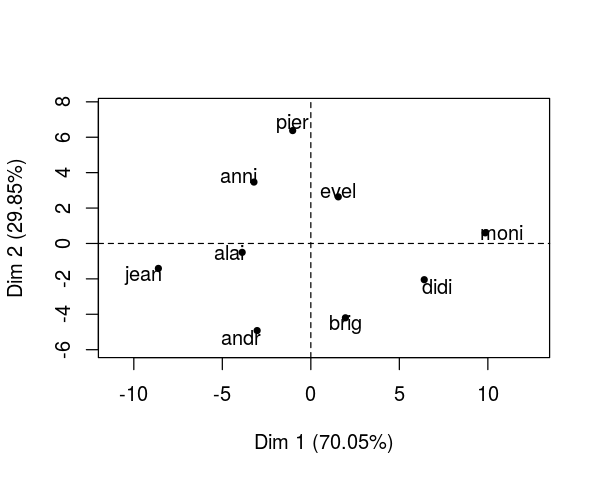

In [57]:
plot(acp,title="")

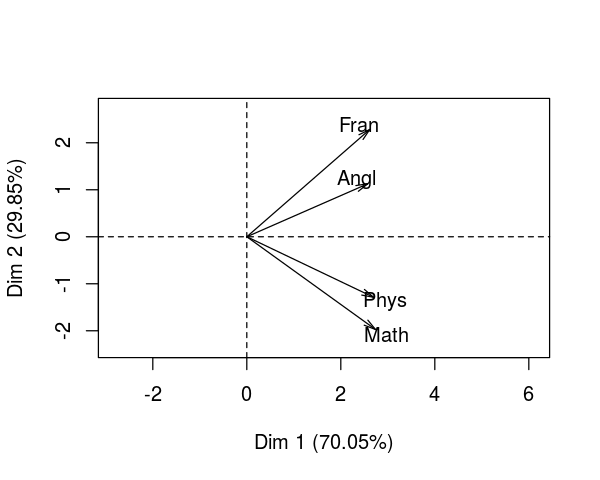

In [58]:
plot(acp, choix="var",title="")

**Q** Quel est le cercle qui apparaît sur ce graphique. Quelle interprétation en tirer?

**En résumé**: le diviseur de la variance dans `princomp` et `PCA` de `FactoMineR` est $n$, celui de `prcomp` est $n-1$. La fonction `PCA`  de `FactoMineR` réduit par défaut mais pas `princomp` ni `prcomp`.

## 3 ACP de courbes de températures
Les données étudiées sont celles du fichier `tempR.dat` disponibles dans le même dépôt que ce calepin.  Il  contient les moyennes, entre 1931 et 1960, des températures mensuelles moyennes de 36 villes françaises. La première variable correspond au nom de la ville (4 caractères), les 12 suivantes représentent chacune un mois de l'année (source : Mémorial de la Météorologie nationale). Une moyenne journalière est la moyenne des températures min et max permettant ensuite de calculer la moyenne mensuelle. Moyenner ensuite sur 10 ces valeurs conduit à des courbes relativement régulières.
### 3.1 Exploration élémentaire

In [59]:
# lire les données dans R
temp=read.table("Data/tempR.dat")
# vérification et stat élémentaires
summary(temp)

      janv            fevr            mars             avri       
 Min.   :0.400   Min.   :1.500   Min.   : 5.500   Min.   : 8.900  
 1st Qu.:2.075   1st Qu.:3.125   1st Qu.: 6.875   1st Qu.: 9.675  
 Median :3.450   Median :4.250   Median : 7.700   Median :10.400  
 Mean   :3.836   Mean   :4.678   Mean   : 8.014   Mean   :10.772  
 3rd Qu.:5.525   3rd Qu.:6.000   3rd Qu.: 9.375   3rd Qu.:11.700  
 Max.   :8.600   Max.   :9.100   Max.   :11.300   Max.   :13.900  
      mai             juin            juil            aout      
 Min.   :11.60   Min.   :14.40   Min.   :15.60   Min.   :16.00  
 1st Qu.:13.30   1st Qu.:16.57   1st Qu.:18.40   1st Qu.:18.12  
 Median :13.90   Median :17.20   Median :19.10   Median :18.75  
 Mean   :14.25   Mean   :17.61   Mean   :19.61   Mean   :19.32  
 3rd Qu.:14.90   3rd Qu.:18.55   3rd Qu.:20.75   3rd Qu.:20.30  
 Max.   :17.10   Max.   :21.10   Max.   :23.80   Max.   :23.30  
      sept            octo            nove             dece      
 Min.   :1

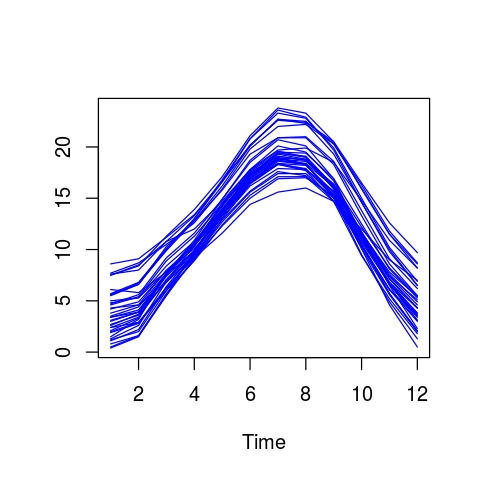

In [60]:
# Ensemble des courbes
options(repr.plot.width=4, repr.plot.height=4)
ts.plot(t(temp),col="blue")

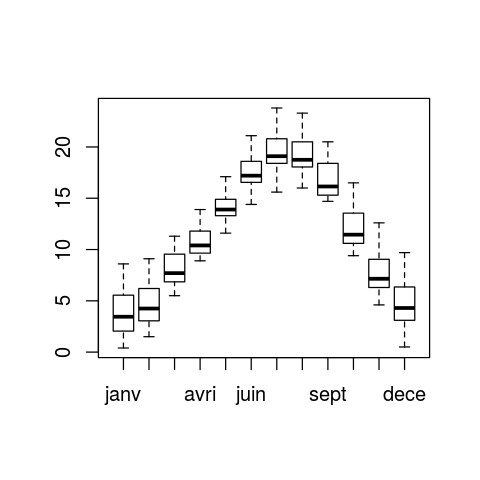

In [61]:
# toutes les distributions
boxplot(temp)

**Q** Que dire des dispersions, de l'homogénéité des unités et des variances?

**Q** Conséquence pour l'ACP?

In [62]:
# Corrélations
cor(temp)

,janv,fevr,mars,avri,mai,juin,juil,aout,sept,octo,nove,dece
janv,1.0000000,0.9885360,0.9199117,0.7825097,0.5995795,0.5663280,0.5398900,0.6296871,0.7907821,0.9276428,0.9753371,0.9948352
fevr,0.9885360,1.0000000,0.9618949,0.8561302,0.6982284,0.6687648,0.6460014,0.7275281,0.8662304,0.9676484,0.9905985,0.9850215
mars,0.9199117,0.9618949,1.0000000,0.9462747,0.8280143,0.8042627,0.7810710,0.8446493,0.9370059,0.9716271,0.9574533,0.9154278
avri,0.7825097,0.8561302,0.9462747,1.0000000,0.9613805,0.9438164,0.9253098,0.9566592,0.9780987,0.9292199,0.8715025,0.7871887
mai,0.5995795,0.6982284,0.8280143,0.9613805,1.0000000,0.9905124,0.9830884,0.9841428,0.9456148,0.8267931,0.7332866,0.6120187
juin,0.5663280,0.6687648,0.8042627,0.9438164,0.9905124,1.0000000,0.9917333,0.9863038,0.9350057,0.8037035,0.7043545,0.5790681
juil,0.5398900,0.6460014,0.7810710,0.9253098,0.9830884,0.9917333,1.0000000,0.9901252,0.9308617,0.7934865,0.6847357,0.5520168
aout,0.6296871,0.7275281,0.8446493,0.9566592,0.9841428,0.9863038,0.9901252,1.0000000,0.9690372,0.8596967,0.7619311,0.6406010
sept,0.7907821,0.8662304,0.9370059,0.9780987,0.9456148,0.9350057,0.9308617,0.9690372,1.0000000,0.9566552,0.8911815,0.7968598
octo,0.9276428,0.9676484,0.9716271,0.9292199,0.8267931,0.8037035,0.7934865,0.8596967,0.9566552,1.0000000,0.9805347,0.9301548


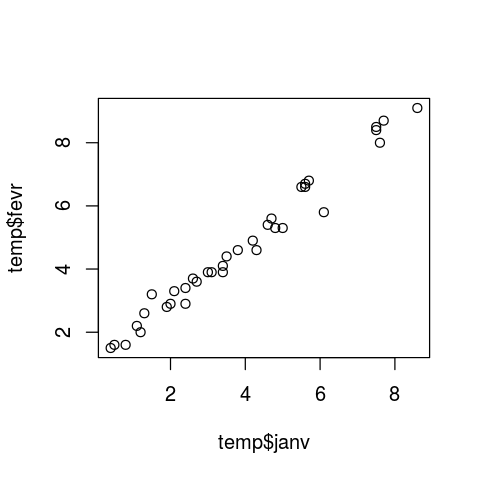

In [63]:
plot(temp$janv,temp$fevr)

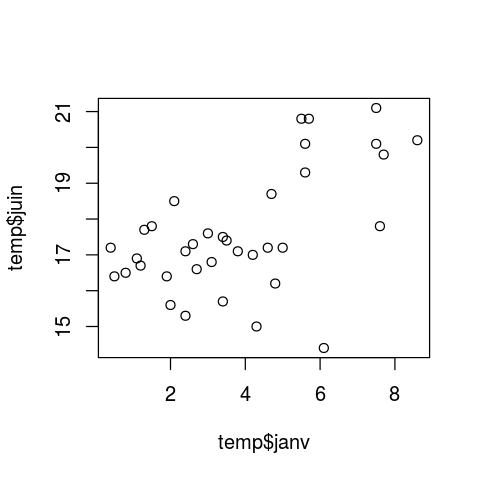

In [64]:
plot(temp$janv,temp$juin)

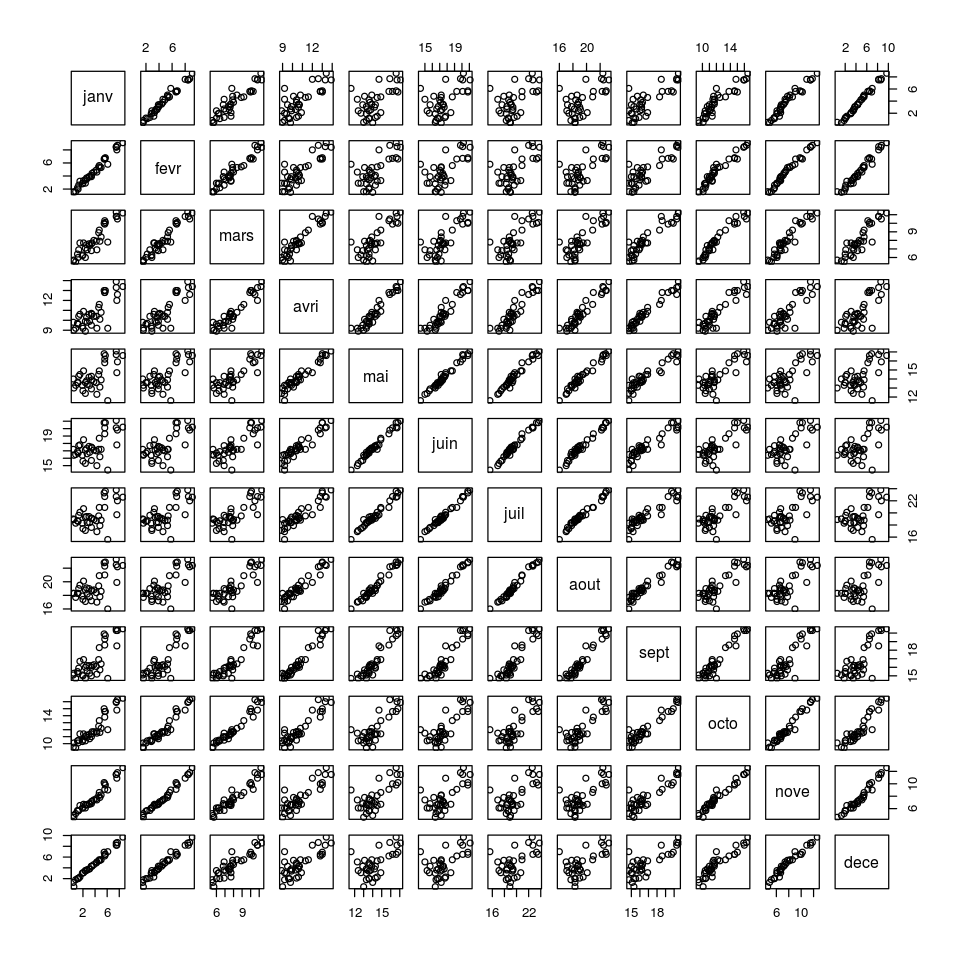

In [65]:
options(repr.plot.width=8, repr.plot.height=8)
pairs(temp)

**Q** Commenter la structure particulière de corrélation entre les variables.
### 3.2 Analyse en composantes principales avec R

Importance of components:
                          Comp.1    Comp.2      Comp.3      Comp.4       Comp.5
Standard deviation     6.1292231 2.3611727 0.414769565 0.326941649 0.2069276866
Proportion of Variance 0.8628821 0.1280549 0.003951431 0.002455167 0.0009835078
Cumulative Proportion  0.8628821 0.9909369 0.994888371 0.997343539 0.9983270463
                             Comp.6       Comp.7       Comp.8       Comp.9
Standard deviation     0.1520441653 0.1321092258 0.1188580102 0.0895782803
Proportion of Variance 0.0005309824 0.0004008731 0.0003244872 0.0001843088
Cumulative Proportion  0.9988580287 0.9992589018 0.9995833889 0.9997676977
                            Comp.10      Comp.11      Comp.12
Standard deviation     0.0745158116 5.859145e-02 3.358871e-02
Proportion of Variance 0.0001275374 7.885134e-05 2.591357e-05
Cumulative Proportion  0.9998952351 9.999741e-01 1.000000e+00

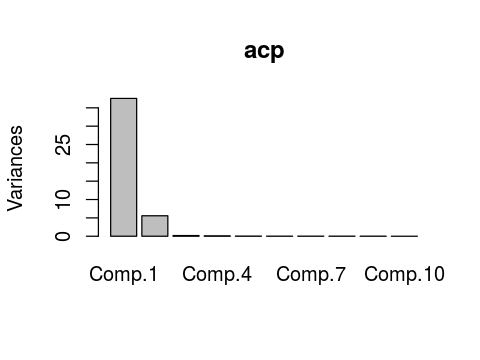

In [66]:
acp=princomp(temp)
summary(acp)
options(repr.plot.width=4, repr.plot.height=3)
plot(acp)

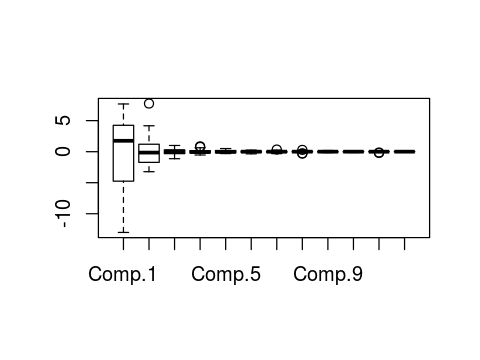

In [67]:
boxplot(data.frame(acp$scores)) 

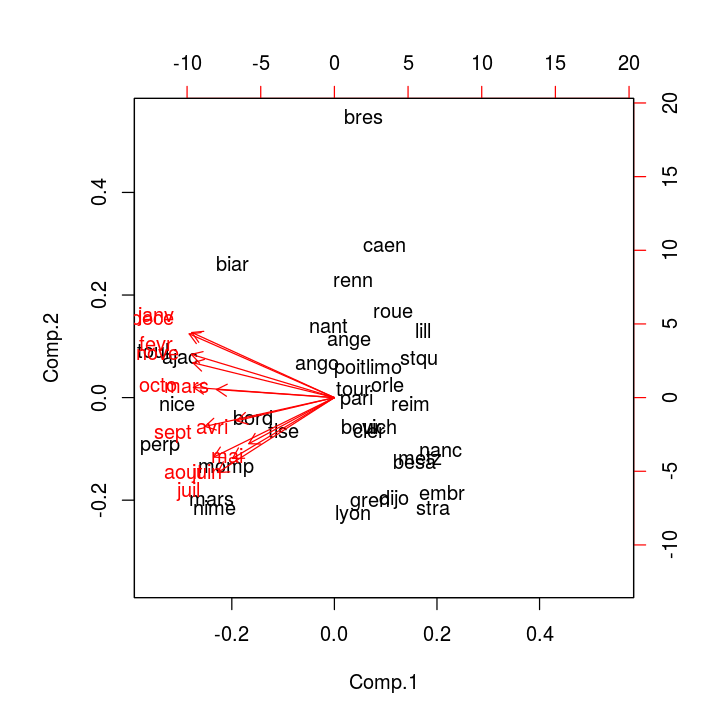

In [68]:
options(repr.plot.width=6, repr.plot.height=6)
biplot(acp)

**Q** Analyser les échelles des axes.

**Q** Expliciter le choix entre ACP réduite ou non, comparer les différences. 

**Q** Combien d'axes faut-il retenir ? Justifier.  

**Q** Identifier la ville atypique de l'axe 2. Que faire ?

**Q** Interprétation des axes.

**Q** Commenter la position d'Embrun sur les graphiques.

Les données sont ici très particulières, des courbes fonction du temps. En conséquence, les vecteurs propres le sont également et les courbes sont décomposées sur cette base de fonctions discrétisées. 

Vecteurs ou plutôt fonctions propres de l'ACP.

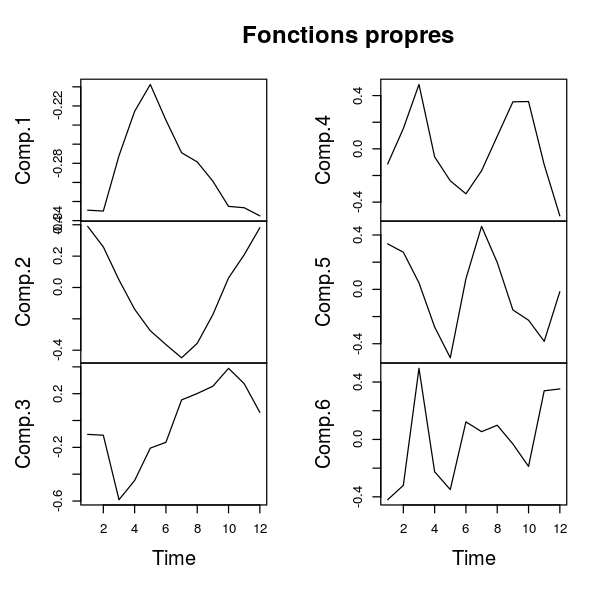

In [69]:
options(repr.plot.width=5, repr.plot.height=5)
plot.ts(acp$loadings[,1:6], main="Fonctions propres")

### 3.3 Librairie FactoMineR
Cette librairie  apporte des compléments intéressants (qualité et options des graphiques, gestion des variables manquantes) et surtout elle vient particulièrement compléter les fonctions de base de R pour l'analyse des variables qualitatives. Voici les principaux résultats de l'ACP.

**Q** Comparer avec les résultats numériques précédemment obtenus.

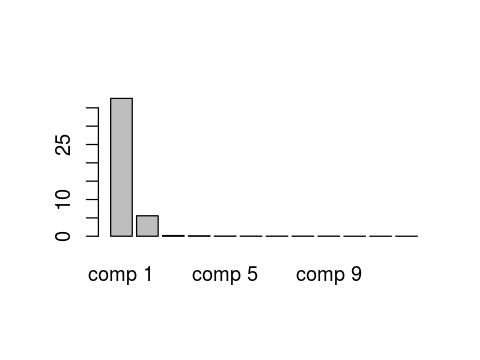

In [70]:
library(FactoMineR)
acp=PCA(temp, scale.unit=FALSE,ncp=12,graph=F)
options(repr.plot.width=4, repr.plot.height=3)
barplot(acp$eig[,1])

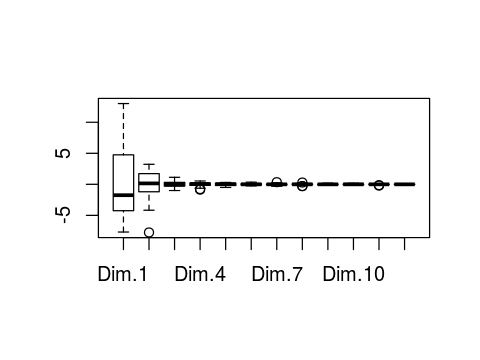

In [71]:
boxplot(acp$ind$coord)

In [72]:
acp$svd$V

0.3290390,-0.38986775,0.10323897,0.11374053,-0.33464352,0.41991694,-0.03799135,0.009415908,0.62535894,-0.11694515,0.122293972,0.08116012
0.3299792,-0.25894200,0.10959282,-0.15238814,-0.27337760,0.32017142,-0.19713748,-0.049425046,-0.69936159,-0.19956697,-0.201528803,0.02704669
0.2721243,-0.04848174,0.59022791,-0.48366714,-0.04750694,-0.49563511,-0.01089671,0.130640789,0.06917833,0.04396375,0.190984072,0.18167230
0.2256422,0.13867035,0.44728993,0.05998080,0.27674747,0.22509261,0.22309526,0.043999772,0.09202144,0.21587666,-0.461667062,-0.52822313
0.1974986,0.27588497,0.20578891,0.24038615,0.50341800,0.34952061,0.08945594,0.218043649,-0.13289208,-0.20290680,0.348433172,0.41637763
0.2348523,0.36424678,0.16208373,0.33757691,-0.07842201,-0.12231944,-0.53922766,-0.567678523,0.05250208,0.16600367,-0.006849728,0.08626309
0.2689712,0.44841122,-0.15360404,0.16440263,-0.46341761,-0.05408440,-0.05973196,0.580726492,-0.06995707,0.13928870,0.187648416,-0.24074892
0.2785683,0.35613931,-0.20142509,-0.09465157,-0.19793622,-0.09896692,0.47519898,-0.162318588,0.11321803,-0.22947791,-0.464575633,0.40446254
0.2987661,0.17265811,-0.25584707,-0.35335024,0.15149284,0.03175098,0.08686552,-0.343440365,0.04041565,-0.37510673,0.405869703,-0.48382859
0.3250880,-0.06102674,-0.38928745,-0.35530687,0.22709208,0.18798525,-0.06478268,-0.003571616,0.01243962,0.69502764,0.017313072,0.19536915
0.3264980,-0.20870484,-0.27465522,0.11877488,0.38224123,-0.33881714,-0.40791482,0.318960811,0.13525372,-0.31694270,-0.333156739,-0.03902356


In [73]:
dimdesc(acp,axes=c(1,2))

,correlation,p.value
octo,0.9917713,6.082440e-32
mars,0.9817701,4.205329e-26
sept,0.9721017,5.410095e-23
nove,0.9677155,6.261790e-22
avri,0.9632506,5.472265e-21
fevr,0.9556016,1.284094e-19
dece,0.9125420,9.296932e-15
janv,0.9082923,2.014294e-14
aout,0.8951904,1.758186e-13
mai,0.8739286,3.428919e-12


**Attention** Cette librairie ajoute à ces techniques exploratoires des résultats d'inférence statistique: *p*-valeurs de test, ellipse de confiance... supposant implicitement un modèle probabiliste: distributions gaussiennes multidimensionnelles; ils sont à utiliser avec grande prudence, plus comme des indicateurs que comme des aides formelles à la décision.

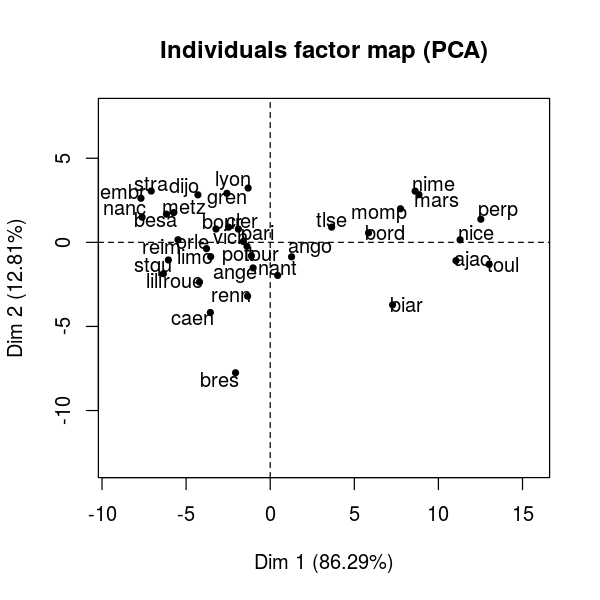

In [74]:
options(repr.plot.width=5, repr.plot.height=5)
plot(acp)

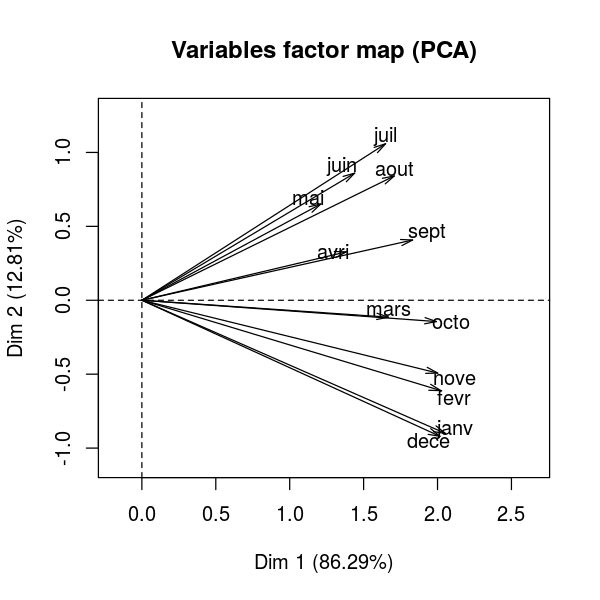

In [75]:
plot(acp,choix="var")

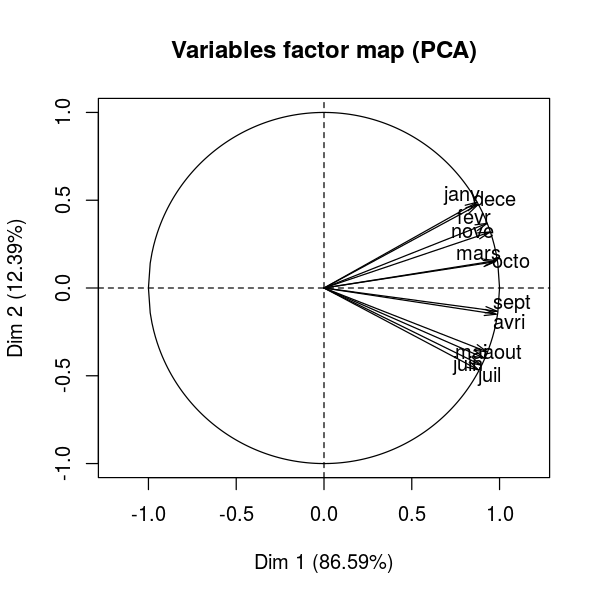

In [76]:
acp=PCA(temp, scale.unit=TRUE,ncp=12,graph=F)
plot(acp,choix="var")

**Q** Quelle différence entre les deux graphiques? Quelle différence entre les deux ACP? 

**Q** Pourquoi les deux réprésentations sont-elles finalement très similaires?

Il s'agit également de résoudre la question concernant l'observation atypique sur l'axe 2. Faut-il la conserver? Cette question est abordée en considérant deux ACPs, celle avec et sans ce point afin de s'assurer que sa suppression ne perturbe pas trop les premiers axes, notamment le 2ème. 

**Q** Comment l'observation atypique et-elle exclue?

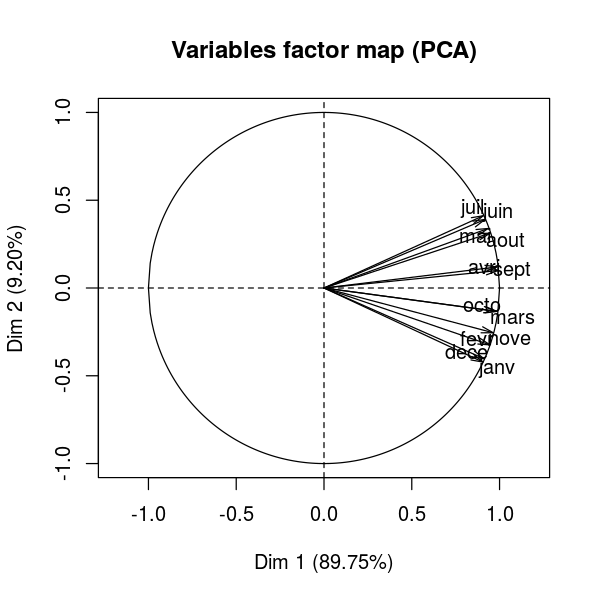

In [77]:
acp=PCA(temp, scale.unit=TRUE,ncp=12,graph=F,ind.sup=8)
plot(acp,choix="var")

**Q** L'interprétation des axes a-t-elle été modifiée? Que faire de l'observation atypique?